In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
from google.colab import files

uploaded_train = files.upload()


Saving train.txt to train.txt


In [ ]:
train_data = pd.read_csv(io.BytesIO(uploaded_train['train.txt']), sep = ' ', header = None)

In [ ]:
train=train_data.to_numpy();
class1=[[x[0],x[1]] for x in train if x[2]==1]
class2=[[x[0],x[1]] for x in train if x[2]==2]
class1 = np.array(class1)
class2 = np.array(class2)

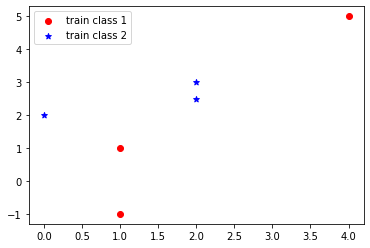

In [ ]:
plt.scatter(class1[:,0], class1[:,1], c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(class2[:,0], class2[:,1], c = 'b', marker = '*', label = 'train class 2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
phi_class1 = np.empty((0,6), int)
phi_class2 = np.empty((0, 6), int)
print(phi_class1)
print(len(phi_class1))

for i in range(len(class1)):
  x1 = class1[i][0]
  x2 = class1[i][1]
  phi_class1 = np.append(phi_class1, np.array([[ x1**2, x2**2, x1*x2, x1, x2, 1]]), axis=0)

for i in range(len(class2)):
  x1 = class2[i][0]
  x2 = class2[i][1]
  phi_class2 = np.append(phi_class2, np.array([[ x1**2, x2**2, x1*x2, x1, x2, 1]]), axis=0)

phi_class2 *= -1

phi_all_class = np.concatenate((phi_class1, phi_class2), axis = 0)

print(phi_class1)
print(phi_class2)

[]
0
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1. -1.  1. -1.  1.]
 [16. 25. 20.  4.  5.  1.]]
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [ ]:
def oneAtATime(initial_weight, learning_rate):
  count = 0
  for i in range(500):
    count = i
    flag = 0
    for i in range( len(phi_all_class)):
      if np.dot(phi_all_class[i], initial_weight) > 0:
        pass
      else:
        initial_weight = initial_weight + (learning_rate * phi_all_class[i])
        flag = 1
    
    if flag == 0:
      break;
  return count+1

In [ ]:
def manyAtATime(initial_weight, learning_rate):
  count = 0
  for i in range( 500):
    count = i
    weight = np.array([ 0, 0, 0, 0, 0, 0])
    flag = 0
    for i in range(0, len(phi_all_class)):
      if np.dot(phi_all_class[i], initial_weight) > 0:
        pass
      else:
        weight = weight + (learning_rate * phi_all_class[i])
        flag = 1
    
    initial_weight = np.add(initial_weight, weight)

    if flag == 0:
      break;
  return count+1

In [ ]:

def result_one(initial_weight, learning_rate):
  res = []
  for i in range(10):
    res.append(oneAtATime(initial_weight, learning_rate[i]))
  return res;

In [ ]:

def result_many(initial_weight, learning_rate):
  res = []
  for i in range(10):
    res.append(manyAtATime(initial_weight, learning_rate[i]))
  return res;

In [ ]:
def printResult(learning_rate, result_oneAtATime, result_manyAtATime):
  print("Alpha(learning rate)\tOne at a time\tMany at a time")
  for i in range(10):
    print(learning_rate[i], "\t\t\t", result_oneAtATime[i], "\t\t", result_manyAtATime[i])

In [ ]:

def displayBarChart(one_at_a_time, many_at_a_time):
  x = np.arange(10)
  plt.title('Perceptron Comparison')
  plt.xlabel('Learning rate')
  plt.ylabel('No of iterations')
  plt.bar(x, one_at_a_time, 0.4, label = 'One at a time')
  plt.bar(x+0.4, many_at_a_time, 0.4, label = 'Many at a time')
  plt.xticks(x+0.2, ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])
  plt.legend(loc = 'best')
  print()
  plt.show()

In [ ]:
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
result_oneAtATime_allZero = []
result_manyAtATime_allZero = []
result_oneAtATime_allOne = []
result_manyAtATime_allOne = []
result_oneAtATime_random = []
result_manyAtATime_random = []

For all zero:
Alpha(learning rate)	One at a time	Many at a time
0.1 			 94 		 105
0.2 			 94 		 105
0.3 			 94 		 92
0.4 			 94 		 105
0.5 			 94 		 92
0.6 			 94 		 92
0.7 			 94 		 92
0.8 			 94 		 105
0.9 			 94 		 105
1 			 94 		 92



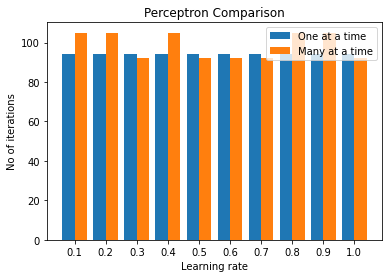



For all one:
Alpha(learning rate)	One at a time	Many at a time
0.1 			 6 		 102
0.2 			 92 		 104
0.3 			 104 		 91
0.4 			 106 		 116
0.5 			 93 		 105
0.6 			 93 		 114
0.7 			 108 		 91
0.8 			 115 		 91
0.9 			 94 		 105
1 			 94 		 93



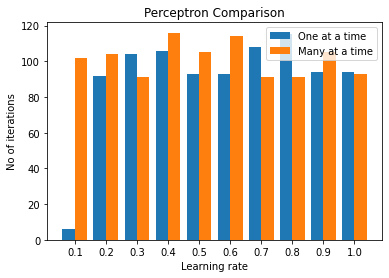



For random:
Alpha(learning rate)	One at a time	Many at a time
0.1 			 105 		 98
0.2 			 109 		 104
0.3 			 93 		 105
0.4 			 108 		 117
0.5 			 96 		 106
0.6 			 94 		 106
0.7 			 97 		 101
0.8 			 84 		 105
0.9 			 94 		 122
1 			 105 		 88



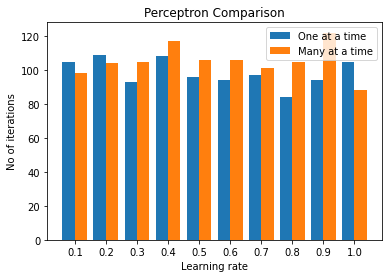

In [ ]:

#all zero
initial_weight = np.zeros(6)
result_oneAtATime_allZero = result_one(initial_weight, learning_rate)
result_manyAtATime_allZero = result_many(initial_weight, learning_rate)
print("For all zero:")
printResult(learning_rate, result_oneAtATime_allZero, result_manyAtATime_allZero)
displayBarChart(result_oneAtATime_allZero, result_manyAtATime_allZero)

#all one
initial_weight = np.ones(6)
result_oneAtATime_allOne = result_one(initial_weight, learning_rate)
result_manyAtATime_allOne = result_many(initial_weight, learning_rate)
print("\n\nFor all one:")
printResult(learning_rate, result_oneAtATime_allOne, result_manyAtATime_allOne)
displayBarChart(result_oneAtATime_allOne, result_manyAtATime_allOne)

#random
np.random.seed(0) #seed = 0
initial_weight = np.random.rand(6)
result_oneAtATime_random = result_one(initial_weight, learning_rate)
result_manyAtATime_random = result_many(initial_weight, learning_rate)
print("\n\nFor random:")
printResult(learning_rate, result_oneAtATime_random, result_manyAtATime_random)
displayBarChart(result_oneAtATime_random, result_manyAtATime_random)